In [ ]:
#@title
try:
    %tensorflow_version 2.x
    COLAB = True
    print("Note: using Google CoLab")
except:
    print("Note: not using Google CoLab")
    COLAB = False

Note: using Google CoLab


**Imports**

In [ ]:
# We are going to bring in all the packages we are going to need for this tutorial 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import pandas as pd
import io
import os
import requests
import numpy as np
from sklearn import metrics
import math
from math import log
import numpy as np 
import matplotlib 
import matplotlib.pyplot as plt



**Data** **Import and** **Cleanup**

In [ ]:
import pandas as pd

url1='https://raw.githubusercontent.com/bielrv/Keras-Daily-Sales-Forecast/master/Daily_sales.csv'

df = pd.read_csv(url1,delimiter=';',index_col='date')

df.drop(columns=['year','month','dayofyear','dayOfMonth','dayOfWeek','week'], inplace=True)

my_index_list=list(df.index)

df['ds']=my_index_list

df.rename(columns={'loans':'y'}, inplace=True)

u=pd.DataFrame()

u['ds']=my_index_list
u['y']=list(df['y'])

my_list=list(u['y']) 

my_list_test=list(u['y'][0:1346])

In [ ]:
df.index

Index(['2014-06-01', '2014-06-02', '2014-06-03', '2014-06-04', '2014-06-05',
       '2014-06-06', '2014-06-07', '2014-06-08', '2014-06-09', '2014-06-10',
       ...
       '2018-02-26', '2018-02-27', '2018-02-28', '2018-03-01', '2018-03-02',
       '2018-03-03', '2018-03-04', '2018-03-05', '2018-03-06', '2018-03-07'],
      dtype='object', name='date', length=1376)

**Defining Derivatives**

In [ ]:
def derivative(my_list):
  return [my_list[0]]+[my_list[i]-my_list[i-1] for i in range(1,len(my_list))]

derivative([1,2,5])

[1, 1, 3]

**Setting up the data to be plugged into Keras**

In [ ]:
X1=[a for a in range(1346)]

X1_pred=[a for a in range(1376)]

Y=my_list_test

Y_pred=my_list

X2=derivative(Y)
X2_pred=derivative(Y_pred)

X3=derivative(X2)
X3_pred=derivative(X2_pred) 

#x12=np.column_stack((X1,X2))
##x12_pred=np.column_stack((X1_pred,X2_pred))

x123=np.column_stack((X1,X2,X3))
x123_pred=np.column_stack((X1_pred,X2_pred,X3_pred))

#x=np.array(X1)
#x=x12
x=x123
#x_pred=np.array(X1_pred)
#x_pred=x12_pred
x_pred=x123_pred
y=np.array(Y) 
y_pred=np.array(Y_pred)

y.std()

2682.6643897768954

**Running the model**

In [ ]:
# Build the neural network. The general rule is that the total number of nodes 
#is approximately 2/3 the sizeof the input. In 
# this case, the size of the input is 1001. We go a little overboard, 
#but it generally does not make too much of a difference. 
# notice that in the first hidden layer (labeled # Hidden 1), input_dim=1. 
#This is because x above is a 1000 by 1 array. 

import time
start_time = time.time()

model = Sequential()
model.add(Dense(3000, input_dim=3, activation='relu')) # Hidden 1
model.add(Dense(1500, activation='relu')) # Hidden 2
#model.add(Dense(55, activation='relu')) # Hidden 3
#model.add(Dense(50, activation='relu')) # Hidden 4
model.add(Dense(1)) # Output
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x,y,verbose=2,epochs=512)

print("My program took", time.time() - start_time, "to run")

Epoch 1/512
43/43 - 2s - loss: 6970002.0000 - 2s/epoch - 55ms/step
Epoch 2/512
43/43 - 2s - loss: 6203235.0000 - 2s/epoch - 42ms/step
Epoch 3/512
43/43 - 2s - loss: 5643316.0000 - 2s/epoch - 42ms/step
Epoch 4/512
43/43 - 2s - loss: 5834650.5000 - 2s/epoch - 43ms/step
Epoch 5/512
43/43 - 2s - loss: 5894033.5000 - 2s/epoch - 42ms/step
Epoch 6/512
43/43 - 2s - loss: 5867024.5000 - 2s/epoch - 42ms/step
Epoch 7/512
43/43 - 2s - loss: 5661549.0000 - 2s/epoch - 42ms/step
Epoch 8/512
43/43 - 2s - loss: 5545695.5000 - 2s/epoch - 42ms/step
Epoch 9/512
43/43 - 2s - loss: 5790930.5000 - 2s/epoch - 42ms/step
Epoch 10/512


**Making predictions**

In [ ]:
# Here we predict entries 100 to 200 of y. Sure, we already know what they are, but this is not the point. Tensorflow takes a 
# sample from another part of y and predicts this part. 

pred = model.predict(x_pred)
print(f"Shape: {pred.shape}")

print(pred[1146:1176])

**Measuring the error**

In [ ]:
# Measure RMSE error.  RMSE is common for regression. 
score = np.sqrt(metrics.mean_squared_error(pred,y_pred))
print(f"Final score (RMSE): {score}")
print(((y.std()-score)/y.std())*100, "percent of variance explained")

Final score (RMSE): 1567.061407266851
41.5856335500403 percent of variance explained


**Manual error computation**

In [ ]:
# Once again, we compare the actual error instead of an "average random error" as above. 

p=pred[1346:1376]
l=list(p)
L=[x[0] for x in l]
M=my_list[1346:1376]
A=my_list
#E=[abs(L[i]-M[i]) for i in range(len(L))]
E=[(L[i]-M[i])**2 for i in range(len(L))]

e=np.sqrt(sum(E)/29)

e, np.array(A).std(), 100*(np.array(A).std()-e)/np.array(A).std()

(1286.1741900490222, 2676.052062741122, 51.937624534420536)

**RESULTS**

In the three runs below, we will be using 3000 in the first layer and 1500 in the second layer for all three situations. 

2 regressors 

(909.1109071928879, 2676.052062741122, 66.02790656241301)

-----

1 regressor, same number of layers 

(1373.8494915140086, 2676.052062741122, 48.66133171913131)

----

No regressors 

(1697.271417025862, 2676.052062741122, 36.57554572061201)







**The same experiment with mean square error** 

No regressors 

(2016.6706547435772, 2676.052062741122, 24.640081453502443)

1 regressor 

(1591.8296460889603, 2676.052062741122, 40.515744508407494)

2 regressors 

(1286.1741900490222, 2676.052062741122, 51.937624534420536)

**We are now going to run the same experiment with Prophet** 

In [ ]:
pip install prophet

     |████████████████████████████████| 65 kB 1.7 MB/s 
     |████████████████████████████████| 49 kB 2.0 MB/s 
     |████████████████████████████████| 43 kB 2.2 MB/s 
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6640534 sha256=714acc9baa22204e9e0c863e59013313be8124e12db74bfc10ba5bec802cc7af
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.


**More imports**

In [ ]:
from prophet import Prophet
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import math 
import os
import datetime
import sys
import numpy 

**Bringing in (same) data**

In [ ]:
prophetdf=u.iloc[0:1346]

prophetdf.tail()

,ds,y
1341,2018-02-01,4200
1342,2018-02-02,7500
1343,2018-02-03,3600
1344,2018-02-04,3800
1345,2018-02-05,5900


**Activating prophet**

In [ ]:
m = Prophet(yearly_seasonality = True)
#m.add_regressor('regressor')
m.add_country_holidays(country_name='US')
m.train_holiday_names
m.fit(prophetdf)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


**Activating the forecast**

In [ ]:
future = m.make_future_dataframe(periods=30)

#future['regressor'] = regressor+regressor[1171:1201]

forecast = m.predict(future)

predicteddf=forecast[['ds', 'yhat']].tail(30)

P=list(predicteddf['yhat'])

P_array=np.array(P) 

predicteddf

**Measuring the error**

In [ ]:
M=list(predicteddf['yhat'])

L=list(u.iloc[1346:1376]['y']) 

E=[(L[i]-M[i])**2 for i in range(len(L))]

A=list(prophetdf['y'])

e=np.sqrt(sum(E)/29)

std=np.array(A).std()

e,std,(std-e)/std

(1284.2455017935533, 2682.6643897768954, 0.5212798489861201)

**Neural Prophet**

In [ ]:
pip install neuralprophet

In [ ]:
from neuralprophet import NeuralProphet

**Activating NeuralProphet**

In [ ]:
# model = NeuralProphet() if you're using default variables below.
model = NeuralProphet(
    growth="linear",  # Determine trend types: 'linear', 'discontinuous', 'off'
    changepoints=None, # list of dates that may include change points (None -> automatic )
    n_changepoints=5,
    #changepoints_range=0.8,
    trend_reg=0,
    trend_reg_threshold=False,
    yearly_seasonality=True,
    weekly_seasonality='auto',
    daily_seasonality='auto',
    seasonality_mode="additive",
    #seasonality_reg=0,
    n_forecasts=1,
    n_lags=0,
    num_hidden_layers=1,
    d_hidden=1000,     # Dimension of hidden layers of AR-Net
    ar_sparsity=None,  # Sparcity in the AR coefficients
    learning_rate=.1,
    epochs=512,
    loss_func="MAE",
    normalize="auto",  # Type of normalization ('minmax', 'standardize', 'soft', 'off')
    impute_missing=True)

**Running the model**

In [ ]:
metrics = model.fit(prophetdf, freq="D")
future = model.make_future_dataframe(u, periods=30, n_historic_predictions=len(u))
forecast = model.predict(future)

INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:NP.utils:Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO:NP.config:Auto-set batch_size to 32
Epoch[512/512]: 100%|██████████| 512/512 [00:40<00:00, 12.80it/s, L1Loss=0.136, MAE=1.19e+3, RMSE=1.76e+3, RegLoss=0]


In [ ]:
forecast_basic=forecast.iloc[1346:1376]

#forecast_basic.drop(columns=['residual1','trend','season_yearly','season_weekly','y'], inplace=True)

forecast_basic.drop(columns=['residual1','trend','season_yearly','y'], inplace=True)

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




In [ ]:
forecast_basic

In [ ]:
M=list(forecast_basic['yhat1'])

L=list(u.iloc[1346:1376]['y']) 

E=[(L[i]-M[i])**2 for i in range(len(L))]

A=list(prophetdf['y'])

e=np.sqrt(sum(E)/29)

std=np.array(A).std()

e,std,(std-e)/std

(1384.01642382117, 2682.6643897768954, 0.4840888673606048)

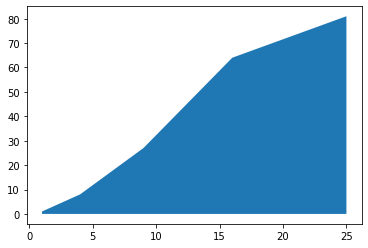

In [ ]:
A=[1,4,9,16,25]
B=[1,8,27,64,81]

#plt.plot(A)
#plt.plot(B)
plt.fill_between(A,B) 
plt.show()



In [ ]:
from shapely.geometry import Polygon

x_y_curve1 = [(0.121,0.232),(2.898,4.554),(7.865,9.987)] #these are your points for curve 1 (I just put some random numbers)
x_y_curve2 = [(1.221,1.232),(3.898,5.554),(8.865,7.987)] #these are your points for curve 2 (I just put some random numbers)

polygon_points = [] #creates a empty list where we will append the points to create the polygon

for xyvalue in x_y_curve1:
    polygon_points.append([xyvalue[0],xyvalue[1]]) #append all xy points for curve 1

for xyvalue in x_y_curve2[::-1]:
    polygon_points.append([xyvalue[0],xyvalue[1]]) #append all xy points for curve 2 in the reverse order (from last point to first point)

for xyvalue in x_y_curve1[0:1]:
    polygon_points.append([xyvalue[0],xyvalue[1]]) #append the first point in curve 1 again, to it "closes" the polygon

polygon = Polygon(polygon_points)
area = polygon.area
print(area)

8.227599999999999
